In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.colors as colors
import warnings
import os.path
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
# Regions of study are 
# East Siberian and Laptev Sea
# [650:800,200:415]
# Kara and Barents Sea
# [475:675,350:500]

subII=[650,800]
subJJ=[200,415]
NX=544 
NY=800
NZ=50
indx=subII[0]
NYloc=subJJ[1]-subJJ[0]

indy=subJJ[0]
NXloc=subII[1]-subII[0]

In [3]:
print(indx,indy, NXloc,NYloc)

(650, 200, 150, 215)


In [4]:
nc_filename=glob.glob('/mnt/storage0/jacquielee/research/data/Jasper/*.nc')
print("found *.nc file: \n{}".format(nc_filename))

# tfile2='/mnt/storage0/xhu/CREG012-I/mask/CREG12_mesh_hgr.nc'

found *.nc file: 
['/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_coordinates.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2004m09d07_gridT.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_grid.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d07_gridU.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d12_gridU.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d07_gridV.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d17_gridT.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_mesh_zgr.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d07_gridT.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d12_gridT.nc', '/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2009m09d07_gridW.nc', '/mnt/storage0/jacquielee/research/data/Jasper/mesh_hgr.nc', '/mnt/storage0/jacquielee/research/data/Jasper/mesh_zgr.

In [5]:
#Open File
tfile2 = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_mesh_hgr.nc')
#print(tfile2.variables)

In [6]:
tfile2.variables

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'nav_lev', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lev(z)
              unlimited dimensions: 
              current shape = (50,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'time_counter', <type 'netCDF4._netCDF4.Variable'>
              float64 time_counter(t)
              unlimited dimensions: t
              current shape = (1,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (

In [7]:
# #e1t=GetNcVar(tfile2,'e1t',[indx indy 0],[NXloc NYloc 1],'xy');
e2t = tfile2.variables['e2t'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]
e2u = tfile2.variables['e2u'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]
# #e1u=GetNcVar(tfile2,'e1u',[indx indy 0],[NXloc NYloc 1],'xy');
e1v = tfile2.variables['e1v'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]
# #e2v=GetNcVar(tfile2,'e2v',[indx indy 0],[NXloc NYloc 1],'xy');

# #glamt=GetNcVar(tfile2,'glamt',[indx indy 0],[NXloc NYloc1],'xy');
gphit = tfile2.variables['gphit'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]

# #glamu=GetNcVar(tfile2,'glamu',[indx indy 0],[NXloc NYloc1],'xy');
gphiu = tfile2.variables['gphiu'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]
# #glamv=GetNcVar(tfile2,'glamv',[indx indy 0],[NXloc NYloc1],'xy');
gphiv = tfile2.variables['gphiv'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]
mbathy = tfile2.variables['mbathy'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]

print(e2u)
#,[indx indy 0],[NXloc NYloc 1],'xy');

[[ 11252.67382812  11278.48046875  11304.13378906 ...,  13137.89355469
   13128.94140625  13119.81445312]
 [ 11289.69433594  11315.48144531  11341.1171875  ...,  13167.73046875
   13158.71582031  13149.52539062]
 [ 11326.34277344  11352.11230469  11377.72851562 ...,  13197.13671875
   13188.05859375  13178.80566406]
 ..., 
 [ 14692.22363281  14714.63964844  14736.8828125  ...,  14976.42285156
   14954.42578125  14932.19335938]
 [ 14718.19824219  14740.58691406  14762.80175781 ...,  14988.60546875
   14966.49707031  14944.15429688]
 [ 14744.38476562  14766.74414062  14788.93164062 ...,  15000.98339844
   14978.765625    14956.3125    ]]


In [8]:
tfile3 = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_mesh_zgr.nc')
print(tfile3.variables)

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
unlimited dimensions: 
current shape = (800, 544)
filling off
), (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
unlimited dimensions: 
current shape = (800, 544)
filling off
), (u'nav_lev', <type 'netCDF4._netCDF4.Variable'>
float32 nav_lev(z)
unlimited dimensions: 
current shape = (50,)
filling off
), (u'time_counter', <type 'netCDF4._netCDF4.Variable'>
float64 time_counter(t)
unlimited dimensions: t
current shape = (1,)
filling off
), (u'glamt', <type 'netCDF4._netCDF4.Variable'>
float32 glamt(t, y, x)
unlimited dimensions: t
current shape = (1, 800, 544)
filling off
), (u'glamu', <type 'netCDF4._netCDF4.Variable'>
float32 glamu(t, y, x)
unlimited dimensions: t
current shape = (1, 800, 544)
filling off
), (u'glamv', <type 'netCDF4._netCDF4.Variable'>
float32 glamv(t, y, x)
unlimited dimensions: t
current shape = (1, 800, 544)
filling off
), (u'glamf', <type 'netCDF4._netCDF4.Vari

In [9]:
# tfile3=nc.Dataset('/mnt/storage0/xhu/CREG012-I/mask/CREG12_mesh_zgr.nc')
# print(tfile3.variables)

# compute the e3u/e3v
e3t_0 = tfile3.variables['e3t_0'][0,:]
e3t_ps = tfile3.variables['e3t_ps'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]
hdept = tfile3.variables['hdept'][0,subII[0]:subII[1],subJJ[0]:subJJ[1]]

e3u = np.zeros((NXloc,NYloc,NZ))
tmpH = np.zeros((NXloc,NYloc))

for k in np.arange(0,NZ):
    for ii in np.arange(0,NXloc):
        for jj in np.arange(0,NYloc):
            tmpH[ii,jj]= e3t_0[k]
            if k == mbathy[ii,jj]:
                tmpH[ii,jj] = e3t_ps[ii,jj]
            e3u[ii,jj,k]=tmpH[ii,jj]
e3v=e3u
#clear tmpH

In [10]:
e3u.shape

(150, 215, 50)

In [22]:
for year in np.arange(2002,2003):
    print(['processing year: ',str(year)])
    zonal_trans=np.zeros((12,73,NXloc,NYloc),dtype=float)
    merid_trans=np.zeros((12,73,NXloc,NYloc),dtype=float)
    zonal_trans_fw=np.zeros((12,73,NXloc,NYloc),dtype=float)
    merid_trans_fw=np.zeros((12,73,NXloc,NYloc),dtype=float)
    zonal_trans_1000m=np.zeros((12,73,NXloc,NYloc),dtype=float)
    merid_trans_1000m=np.zeros((12,73,NXloc,NYloc),dtype=float)
    zonal_trans_fw_1000m=np.zeros((12,73,NXloc,NYloc),dtype=float)
    merid_trans_fw_1000m=np.zeros((12,73,NXloc,NYloc),dtype=float)
    for month in np.arange(1,2):
        ind=0
        for day in np.arange(1,6):
            tfilx='/mnt/storage2/xhu/NEMO/ANHA4-EXH004/ANHA4-EXH004_y'+str(year)+'m'
            tfile= tfilx+str(month).zfill(2)+'d'+str(day).zfill(2)+'_gridT.nc'
            tfileu= tfilx+str(month).zfill(2)+'d'+str(day).zfill(2)+'_gridU.nc'
            tfilev= tfilx+str(month).zfill(2)+'d'+str(day).zfill(2)+'_gridV.nc'
            print(tfile)
            if os.path.exists(tfile):
                print('exists')
                tfile = nc.Dataset(tfile)
                tfileu = nc.Dataset(tfileu)
                tfilev = nc.Dataset(tfilev)
                ind=ind+1
                temp=tfile.variables['votemper'][0,:,subII[0]:subII[1],subJJ[0]:subJJ[1]]
                sal =tfile.variables['vosaline'][0,:,subII[0]:subII[1],subJJ[0]:subJJ[1]]
                uvel=tfileu.variables['vozocrtx'][0,:,subII[0]:subII[1],subJJ[0]:subJJ[1]]
                vvel=tfilev.variables['vomecrty'][0,:,subII[0]:subII[1],subJJ[0]:subJJ[1]]
                print(temp.shape,sal.shape,uvel.shape)
                        
                        #define western N.America boundary indices, Davis Strait to south of Grand Banks, continent to offshore
        #x=80 to 180, y=70 to 240
              #note depth level 24 is 989.2 m

                for ic in np.arange(0,NXloc-1):
                      for jc in np.arange(0,NYloc-1):
                    # u
                        if (hdept[ic,jc] < 100) and (hdept[ic+1,jc] > 100):
                            for kk in np.arange(0,mbathy[ic,jc]):
                                    fwmean_ew=(34.8-(sal[kk,ic,jc]+sal[kk,ic+1,jc])/2.0)/34.8
                                    zonal_trans[month-1,ind,ic,jc]=zonal_trans[month-1,ind,ic,jc]+uvel[kk,ic,jc]*e2u[ic,jc]*e3u[ic,jc,kk]
                                    zonal_trans_fw[month-1,ind,ic,jc]=zonal_trans_fw[month-1,ind,ic,jc]+uvel[kk,ic,jc]*fwmean_ew*e2u[ic,jc]*e3u[ic,jc,kk]
                                    print(zonal_trans[month-1,ind,ic,jc],zonal_trans_fw[month-1,ind,ic,jc])
                        if (hdept[ic,jc] < 1000) and (hdept[ic+1,jc] > 1000):
                             for kk in np.arange(0,mbathy[ic,jc]):
                                    fwmean_ew=(34.8-(sal[kk,ic,jc]+sal[kk,ic+1,jc])/2.0)/34.8;
                                    zonal_trans_1000m[month-1,ind,ic,jc]=zonal_trans_1000m[month-1,ind,ic,jc]+uvel[kk,ic,jc]*e2u[ic,jc]*e3u[ic,jc,kk]
                                    zonal_trans_fw_1000m[month-1,ind,ic,jc]=zonal_trans_fw_1000m[month-1,ind,ic,jc]+uvel[kk,ic,jc]*fwmean_ew*e2u[ic,jc]*e3u[ic,jc,kk]
                        if (hdept[ic,jc] > 100) and (hdept[ic+1,jc] < 100):
                             for kk in np.arange(0,mbathy[ic+1,jc]):
                                    fwmean_ew=(34.8-(sal[kk,ic,jc]+sal[kk,ic+1,jc])/2.0)/34.8
                                    zonal_trans[month-1,ind,ic,jc]=zonal_trans[month-1,ind,ic,jc]-uvel[kk,ic,jc]*e2u[ic,jc]*e3u[ic,jc,kk]
                                    zonal_trans_fw[month-1,ind,ic,jc]=zonal_trans_fw[month-1,ind,ic,jc]-uvel[kk,ic,jc]*fwmean_ew*e2u[ic,jc]*e3u[ic,jc,kk]
                        
                        if (hdept[ic,jc] > 1000) and (hdept[ic+1,jc] < 1000):
                             for kk in np.arange(0,mbathy[ic+1,jc]):
                                    fwmean_ew=(34.8-(sal[kk,ic,jc]+sal[kk,ic+1,jc])/2.0)/34.8
                                    zonal_trans_1000m[month-1,ind,ic,jc]=zonal_trans_1000m[month-1,ind,ic,jc]-uvel[kk,ic,jc]*e2u[ic,jc]*e3u[ic,jc,kk]
                                    zonal_trans_fw_1000m[month-1,ind,ic,jc]=zonal_trans_fw_1000m[month-1,ind,ic,jc]-uvel[kk,ic,jc]*fwmean_ew*e2u[ic,jc]*e3u[ic,jc,kk]
                

                      #v
                        if (hdept[ic,jc] < 100) and (hdept[ic,jc+1] > 100):
                            for kk in np.arange(0,mbathy[ic,jc]):
                                    fwmean_ns=(34.8-(sal[kk,ic,jc]+sal[kk,ic,jc+1])/2.0)/34.8
                                    merid_trans[month-1,ind,ic,jc]=merid_trans[month-1,ind,ic,jc]+vvel[kk,ic,jc]*e1v[ic,jc]*e3v[ic,jc,kk]
                                    merid_trans_fw[month-1,ind,ic,jc]=merid_trans_fw[month-1,ind,ic,jc]+vvel[kk,ic,jc]*fwmean_ns*e1v[ic,jc]*e3v[ic,jc,kk]
                                    
                        if (hdept[ic,jc] < 1000) and (hdept[ic+1,jc] > 1000):
                            for kk in np.arange(0,mbathy[ic,jc]):
                                    fwmean_ns=(34.8-(sal[kk,ic,jc]+sal[kk,ic,jc+1])/2.0)/34.8
                                    merid_trans_1000m[month-1,ind,ic,jc]=merid_trans_1000m[month-1,ind,ic,jc]+vvel[kk,ic,jc]*e1v[ic,jc]*e3v[ic,jc,kk]
                                    merid_trans_fw_1000m[month-1,ind,ic,jc]=merid_trans_fw_1000m[month-1,ind,ic,jc]+vvel[kk,ic,jc]*fwmean_ns*e1v[ic,jc]*e3v[ic,jc,kk]
                         
                        if (hdept[ic,jc] > 100) and (hdept[ic,jc+1] < 100):
                            for kk in np.arange(0,mbathy[ic,jc+1]):
                                    fwmean_ns=(34.8-(sal[kk,ic,jc]+sal[kk,ic,jc+1])/2.0)/34.8
                                    merid_trans[month-1,ind,ic,jc]=merid_trans[month-1,ind,ic,jc]-vvel[kk,ic,jc]*e1v[ic,jc]*e3v[ic,jc,kk]
                                    merid_trans_fw[month-1,ind,ic,jc]=merid_trans_fw[month-1,ind,ic,jc]-vvel[kk,ic,jc]*fwmean_ns*e1v[ic,jc]*e3v[ic,jc,kk]
                         
                        if (hdept[ic,jc] > 1000) and (hdept[ic,jc+1] < 1000):
                            for kk in np.arange(0,mbathy[ic,jc+1]):
                                    fwmean_ns=(34.8-(sal[kk,ic,jc]+sal[kk,ic,jc+1])/2.0)/34.8
                                    merid_trans_1000m[month-1,ind,ic,jc]=merid_trans_1000m[month-1,ind,ic,jc]-vvel[kk,ic,jc]*e1v[ic,jc]*e3v[ic,jc,kk]
                                    merid_trans_fw_1000m[month-1,ind,ic,jc]=merid_trans_fw_1000m[month-1,ind,ic,jc]-vvel[kk,ic,jc]*fwmean_ns*e1v[ic,jc]*e3v[ic,jc,kk]

#     utfile=strcat('lc_cross_isobath_transport_anha4_',num2str(year))
#     eval(['save ', utfile,' zonal_trans merid_trans zonal_trans_fw
# merid_trans_fw zonal_trans_3000m merid_trans_3000m zonal_trans_fw_3000m
# merid_trans_fw_3000m ']);


total_trans=zonal_trans+merid_trans
# %total_trans_fw=zonal_trans_fw+merid_trans_fw;
# %total_trans_3000m=zonal_trans_3000m+merid_trans_3000m;
# %total_trans_fw_3000m=zonal_trans_fw_3000m+merid_trans_fw_3000m;

# %save -v7.3 lc_cross_isobath_transport_natl12 total_trans total_trans_fw
# total_trans_3000m total_trans_fw_3000m
# %save lc_cross_isobath_transport_natl12 total_trans total_trans_fw
# total_trans_3000m total_trans_fw_3000m

['processing year: ', '2002']
/mnt/storage2/xhu/NEMO/ANHA4-EXH004/ANHA4-EXH004_y2002m01d01_gridT.nc
/mnt/storage2/xhu/NEMO/ANHA4-EXH004/ANHA4-EXH004_y2002m01d02_gridT.nc
/mnt/storage2/xhu/NEMO/ANHA4-EXH004/ANHA4-EXH004_y2002m01d03_gridT.nc
/mnt/storage2/xhu/NEMO/ANHA4-EXH004/ANHA4-EXH004_y2002m01d04_gridT.nc
/mnt/storage2/xhu/NEMO/ANHA4-EXH004/ANHA4-EXH004_y2002m01d05_gridT.nc
exists
((50, 150, 215), (50, 150, 215), (50, 150, 215))
(-646.96799854748929, -71.271367020648142)
(-1327.7738364772445, -146.27038220196832)
(-2049.4509314328866, -225.77146620729519)
(-2962.2774350366317, -325.47318914631734)
(-3917.4546965283957, -423.83809726213235)
(-4879.8609157651263, -513.97420848600416)
(-5798.2337049095004, -590.7256004947925)
(-6656.5449261861168, -654.47828973447622)
(-7454.4901914121401, -707.51397077615036)
(-8191.406024376226, -751.05995134345551)
(-8882.9812322804064, -788.00111749775715)
(-9582.6106819621218, -822.29026551789127)
(-10385.1389003555, -858.84703220807603)
(-11220.3

In [12]:
print(merid_trans.shape,uvel.shape,e1v.shape)

((12, 73, 150, 215), (50, 150, 215), (150, 215))


In [14]:
# zonal_trans.dump('/mnt/storage0/jacquielee/data/zonal_trans.npy')
# merid_trans.dump('/mnt/storage0/jacquielee/data/merid_trans.npy')
# zonal_trans_fw.dump('/mnt/storage0/jacquielee/data/zonal_trans_fw.npy')
# merid_trans_fw.dump('/mnt/storage0/jacquielee/data/merid_trans_fw.npy')
# zonal_trans_1000m.dump('/mnt/storage0/jacquielee/data/zonal_trans_1000m.npy')
# merid_trans_1000m.dump('/mnt/storage0/jacquielee/data/merid_trans_1000m.npy')
# zonal_trans_fw_1000m.dump('/mnt/storage0/jacquielee/data/zonal_trans_fw_1000m.npy')
# merid_trans_fw_1000m.dump('/mnt/storage0/jacquielee/data/merid_trans_fw_1000m.npy')


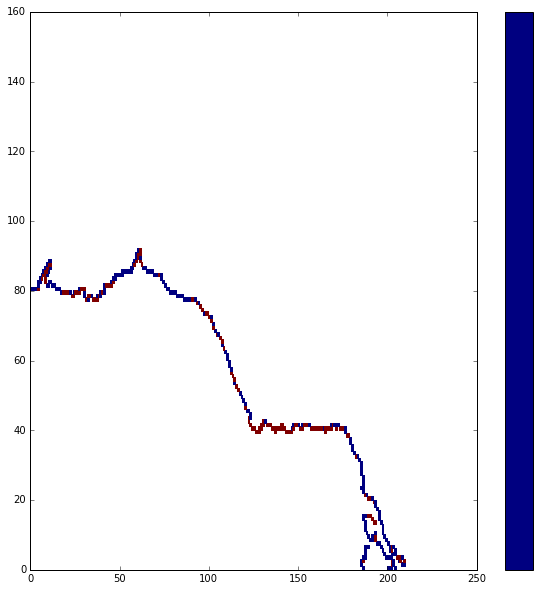

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

cmap = plt.get_cmap('jet')
#cmap.set_bad('burlywood')
mesh = axes.pcolormesh(total_trans1,
                       norm=colors.SymLogNorm(linthresh=10**(-16) , vmin=total_trans1.min(), vmax=total_trans1.max()),cmap=cmap)
cbar = fig.colorbar(mesh,ax=axes)

#print(np.amax(merid_trans[:,:,:,:]))


In [15]:
import numpy.ma as ma
#total_trans = ma.masked_invalid(zonal_trans)
total_trans1 = ma.masked_where(total_trans[0,1,:,:] == 0.0, total_trans[0,1,:,:])

In [25]:
total_trans1.min()

nan

In [17]:
grid = nc.Dataset('//mnt/storage0/jacquielee/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = grid.variables['Bathymetry'][:]
bathy = ma.masked_values(bathy[:],0)

In [18]:
lats = np.array(grid.variables['nav_lat'])
lons = np.array(grid.variables['nav_lon'])
bathy = np.array(grid.variables['Bathymetry'][:,:])

In [19]:
# kbsc_lat = [lats[475,325],lats[675,325],lats[675,500],lats[475,500],lats[475,325]]
# kbsc_lon = [lons[475,325],lons[675,325],lons[675,500],lons[475,500],lons[475,325]]

esls_lat = [lats[650,200],lats[799,200],lats[799,415],lats[650,415],lats[650,200]]
esls_lon = [lons[650,200],lons[799,200],lons[799,415],lons[650,415],lons[650,200]]

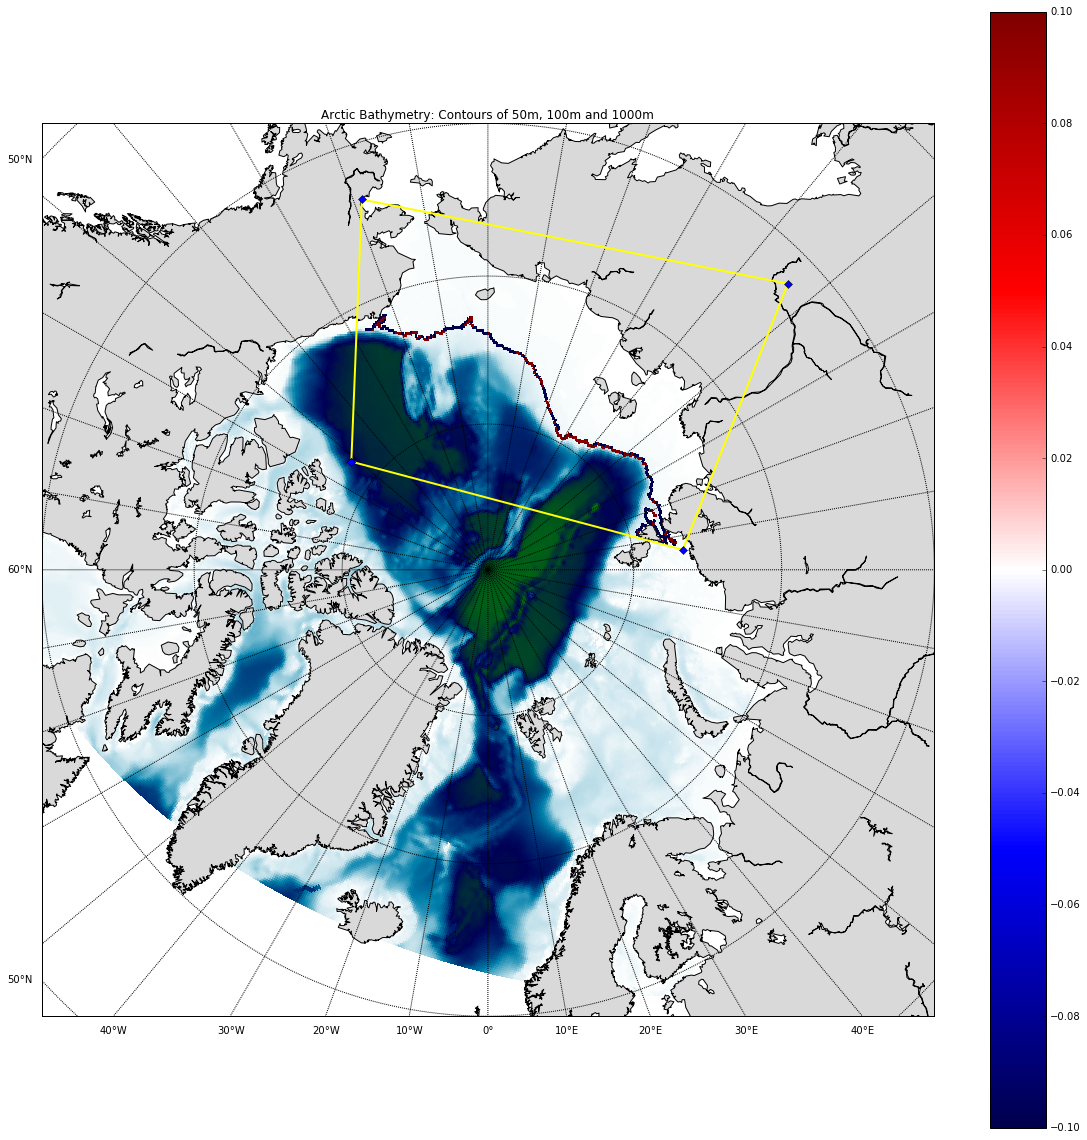

In [20]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],latmax=90)
cmap = plt.get_cmap('ocean_r')
x_lons, y_lats = m(lons, lats)
maps = m.pcolor(x_lons[400:-1,:], y_lats[400:-1,:], bathy[400:-1,:],cmap=cmap)

#cbar = plt.colorbar(maps)

#clines = m.contour(x_lons[475:675,325:500], y_lats[475:675,325:500], bathy[475:675,325:500],np.array([50,100,1000]),colors=['purple','fuchsia','cyan'])
#clines = m.contour(x_lons[650:800,200:415], y_lats[650:800,200:415], bathy[650:800,200:415],np.array([50,100,1000]),colors=['purple','fuchsia','cyan'])
#ax.clabel(clines, fmt='%1.1f')
# cbar = plt.colorbar(clines)
#cbar.add_lines(clines) 
cmap1 = plt.get_cmap('seismic')
clines2 = m.pcolor(x_lons[650:800,200:415], y_lats[650:800,200:415],total_trans1, cmap=cmap1)
cbar = plt.colorbar(clines2)
# x, y = m(kbsc_lon, kbsc_lat) # forgot this line
# m.plot(x, y, 'D-', markersize=5, linewidth=2, color='yellow', markerfacecolor='b') 


x2, y2 = m(esls_lon, esls_lat) # forgot this line
m.plot(x2, y2, 'D-', markersize=5, linewidth=2, color='yellow', markerfacecolor='b') 

plt.title('Arctic Bathymetry: Contours of 50m, 100m and 1000m')
plt.show()


In [34]:
for ii in np.arange(0,len(total_trans1[:,0])):
    for jj in np.arange(0,len(total_trans1[0,:])):
        if (total_trans1[ii,jj] == 0.0) or (total_trans1[ii,jj] is ma.masked):
            continue
        else:
            print(total_trans1[ii,jj])

-51658.1673667
nan
-24757.6954704
-93815.7159541
-78021.1063619
-138688.722624
63660.2635655
-194424.397636
nan
-1337.70827344
-76170.7070372
46557.8305952
100033.003575
-176307.016787
-54162.0134924
1117.08644332
15213.5773147
-52281.9192168
nan
-41062.0386299
-55853.2992973
-34872.730107
-62657.8258773
91284.5551688
59513.8211052
46139.8751457
nan
-78021.4649753
-1104.41325764
nan
-140027.576209
-88792.9770019
-91043.6525084
-1667.16795173
-102322.833642
117925.443517
nan
-108606.325435
nan
nan
-48.7968744772
nan
77178.7992766
nan
-15663.146759
-14789.0273319
nan
-107678.140928
nan
nan
51253.9337581
nan
nan
nan
6747.35423466
nan
nan
nan
-113229.406868
-67960.4633736
-109617.726712
-47717.7090472
nan
-31342.3394415
42061.3383118
41458.7168057
nan
-85459.2435748
69264.0423891
-215628.194952
-58556.6423473
nan
nan
57105.0545939
62485.9442062
-202134.197054
nan
-44488.6358951
-146362.479855
146931.064008
nan
128830.978172
118677.919839
nan
133885.198324
nan
-96018.9480602
-270371.359968
